In [334]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot
#plotly is simple syntax and is used to easy visualize of data
from sklearn.metrics import accuracy_score

In [335]:
pyo.init_notebook_mode(connected=True)

In [336]:
df= pd.read_csv('C:/Users/chakr/Downloads/heart.csv')
#read csv file

In [337]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [338]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(df.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [339]:
df['target']
#calling column name called target

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [340]:
df.groupby('target').size()
#to know how many are 0 and 1

target
0    138
1    165
dtype: int64

In [341]:
df.shape

(303, 14)

In [342]:
df.size

4242

In [343]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [344]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# VISUALIZATION

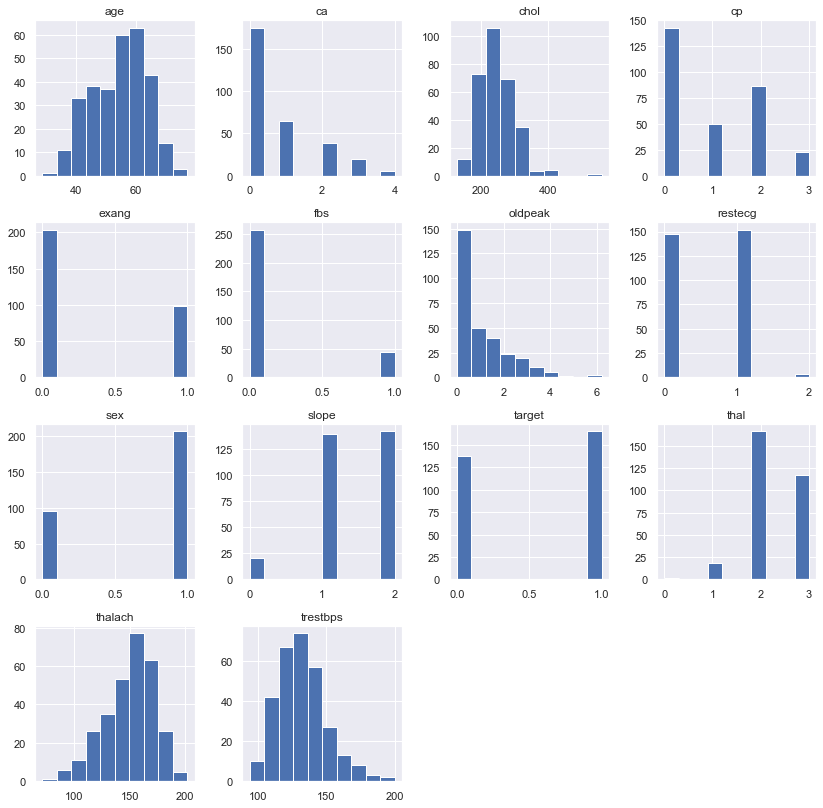

In [345]:
df.hist(figsize=(14,14))
plt.show()

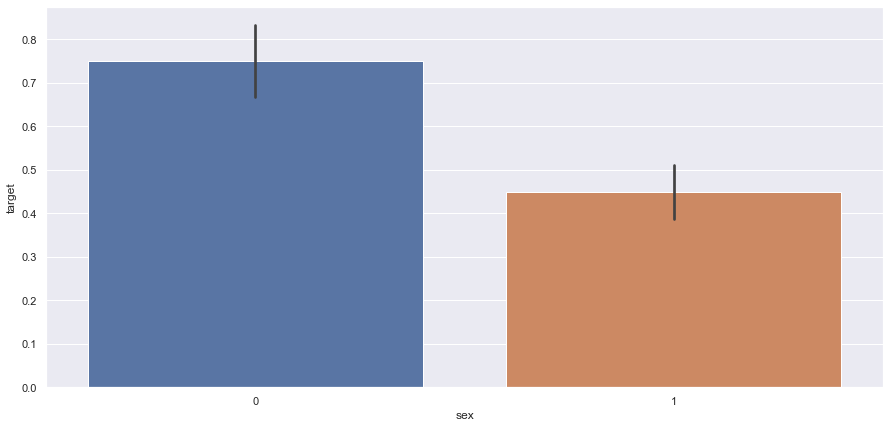

In [346]:
#using seaborn
sns.barplot(df['sex'],df['target'])
#x-axis is sex y-axis is target to show how many people getting stroke according to gender
plt.show()

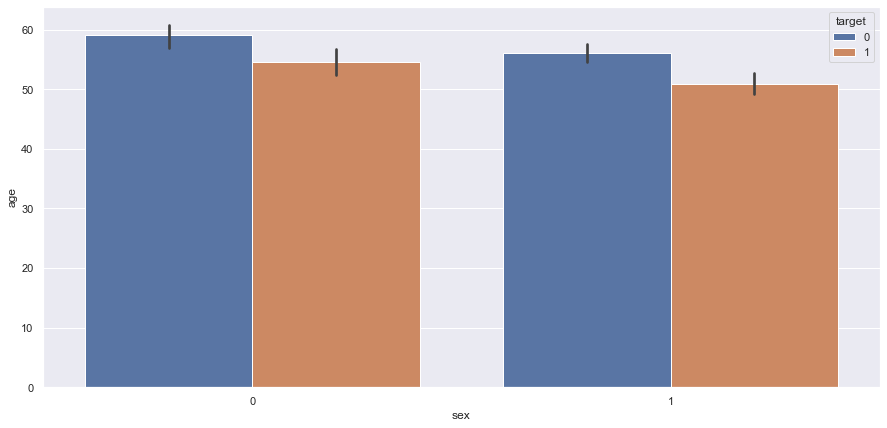

In [347]:
sns.barplot(df['sex'],df['age'],hue=df['target'])
plt.show()
#x is sex y is age in x there are two one is for 0 and 1

In [348]:
px.bar(df,df['sex'],df['target'])
#using plotly if you hover it will show you data

In [349]:
numeric_columns=['trestbps','chol','thalach','age','oldpeak']

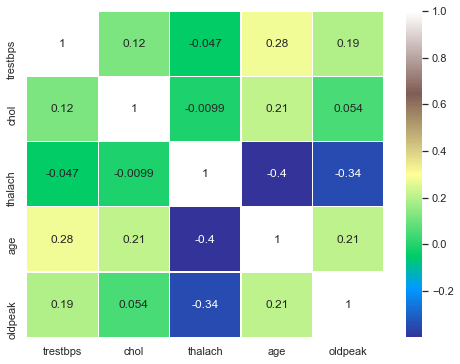

In [350]:
sns.heatmap(df[numeric_columns].corr(),annot=True, cmap='terrain', linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()

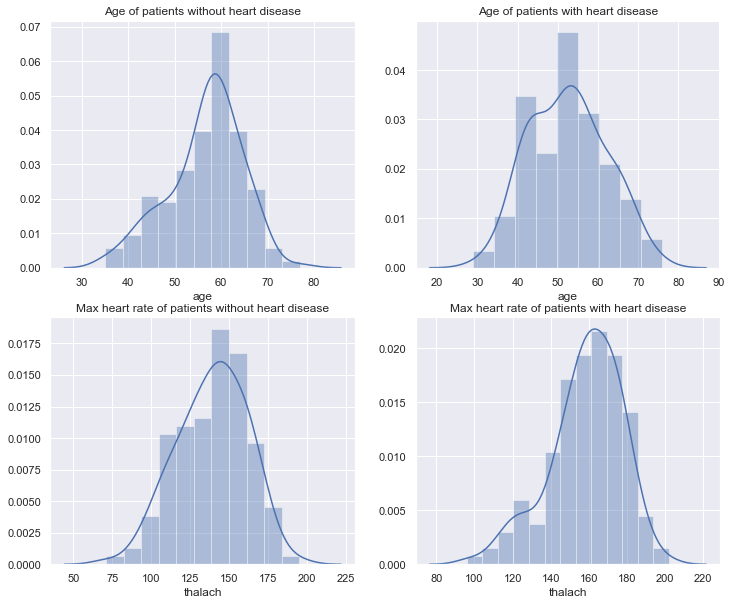

In [351]:
plt.figure(figsize=(12,10))
plt.subplot(221)
#2 is the size 2*2 matrix and 1st graph =221
sns.distplot(df[df['target']==0].age)
plt.title('Age of patients without heart disease')
plt.subplot(222)
sns.distplot(df[df['target']==1].age)
plt.title('Age of patients with heart disease')
plt.subplot(223)
sns.distplot(df[df['target']==0].thalach )
plt.title('Max heart rate of patients without heart disease')
plt.subplot(224)
sns.distplot(df[df['target']==1].thalach )
plt.title('Max heart rate of patients with heart disease')
plt.show()


# Processing of data

In [352]:
X,y=df.loc[:,:'thal'],df.loc[:,'target']
#x = upto thal value excluding target
#y = target

In [353]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [354]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [355]:
X.shape

(303, 13)

In [356]:
#70% for training and 30% for testing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [357]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=10,test_size=0.3,shuffle=True)

In [358]:
X_train.shape

(212, 13)

In [359]:
X_test.shape

(91, 13)

In [360]:
y_train.shape

(212,)

In [361]:
y_test.shape

(91,)

In [383]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# ACCURACY,PRECISION F1SCORE COMPARISION FOR CLASSIFIACTION ALGORITHMS

In [126]:
import pandas as pd
import matplotlib.pyplot as plt

In [127]:
data_set= pd.read_csv('C:/Users/chakr/Downloads/heart.csv') 

In [128]:
x= data_set.iloc[:,0:13].values
y= data_set.iloc[:,13].values


In [129]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.3, random_state=11) 

In [130]:
from sklearn.preprocessing import StandardScaler
st_x= StandardScaler()
x_train= st_x.fit_transform(x_train)
x_test= st_x.transform(x_test)

In [131]:
from sklearn.linear_model import LogisticRegression
classifier= LogisticRegression()
classifier.fit(x_train, y_train)

LogisticRegression()

In [132]:
y_pred= classifier.predict(x_test) 

In [133]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import precision_recall_fscore_support
cm= confusion_matrix(y_test, y_pred)
clasr1=classification_report(y_test,y_pred)

# Logistic regression

In [134]:
print("confusion_matrix:",cm)
print("classification_report:")
print(clasr1)

confusion_matrix: [[29  9]
 [10 43]]
classification_report:
              precision    recall  f1-score   support

           0       0.74      0.76      0.75        38
           1       0.83      0.81      0.82        53

    accuracy                           0.79        91
   macro avg       0.79      0.79      0.79        91
weighted avg       0.79      0.79      0.79        91



In [135]:
from sklearn.tree import DecisionTreeClassifier
classifier= DecisionTreeClassifier()
classifier.fit(x_train, y_train) 

DecisionTreeClassifier()

In [136]:
y_pred= classifier.predict(x_test)

In [137]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import precision_recall_fscore_support

In [138]:
cm= confusion_matrix(y_test, y_pred)
clasr1=classification_report(y_test,y_pred)

# Decision tree

In [139]:
print("confusion_matrix:",cm)
print("classification_report:")
print(clasr1)

confusion_matrix: [[28 10]
 [18 35]]
classification_report:
              precision    recall  f1-score   support

           0       0.61      0.74      0.67        38
           1       0.78      0.66      0.71        53

    accuracy                           0.69        91
   macro avg       0.69      0.70      0.69        91
weighted avg       0.71      0.69      0.69        91



In [140]:
from sklearn.neighbors import KNeighborsClassifier
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )
classifier.fit(x_train, y_train) 

KNeighborsClassifier()

In [141]:
y_pred= classifier.predict(x_test)

In [142]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm= confusion_matrix(y_test, y_pred)
clasr1=classification_report(y_test,y_pred)

# knn

In [143]:
print("confusion_matrix:",cm)
print("classification_report:")
print(clasr1)

confusion_matrix: [[29  9]
 [ 9 44]]
classification_report:
              precision    recall  f1-score   support

           0       0.76      0.76      0.76        38
           1       0.83      0.83      0.83        53

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91



In [144]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train) 

GaussianNB()

In [145]:
y_pred = classifier.predict(x_test)

In [146]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import precision_recall_fscore_support

In [147]:
cm= confusion_matrix(y_test, y_pred)
clasr1=classification_report(y_test,y_pred)

# Naive bayes

In [148]:
print("confusion_matrix:",cm)
print("classification_report:")
print(clasr1)

confusion_matrix: [[33  5]
 [ 8 45]]
classification_report:
              precision    recall  f1-score   support

           0       0.80      0.87      0.84        38
           1       0.90      0.85      0.87        53

    accuracy                           0.86        91
   macro avg       0.85      0.86      0.85        91
weighted avg       0.86      0.86      0.86        91



In [149]:
from sklearn.svm import SVC # "Support vector classifier"
classifier = SVC(kernel='linear', random_state=0)
classifier.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

In [150]:
y_pred= classifier.predict(x_test)

In [151]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import precision_recall_fscore_support

In [152]:
cm= confusion_matrix(y_test, y_pred)
clasr1=classification_report(y_test,y_pred)

# SVC

In [153]:
print("confusion_matrix:",cm)
print("classification_report:")
print(clasr1)

confusion_matrix: [[29  9]
 [ 9 44]]
classification_report:
              precision    recall  f1-score   support

           0       0.76      0.76      0.76        38
           1       0.83      0.83      0.83        53

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91



In [154]:
from sklearn.neural_network import MLPClassifier

In [155]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
 hidden_layer_sizes=(5, 2))
clf.fit(x_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), solver='lbfgs')

In [156]:
y_pred= clf.predict(x_test) 

In [157]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import precision_recall_fscore_support

In [158]:
cm= confusion_matrix(y_test, y_pred)
clasr1=classification_report(y_test,y_pred)

# MLP

In [159]:
print("confusion_matrix:",cm)
print("classification_report:")
print(clasr1)

confusion_matrix: [[30  8]
 [15 38]]
classification_report:
              precision    recall  f1-score   support

           0       0.67      0.79      0.72        38
           1       0.83      0.72      0.77        53

    accuracy                           0.75        91
   macro avg       0.75      0.75      0.75        91
weighted avg       0.76      0.75      0.75        91



In [160]:
import pandas as pd
import matplotlib.pyplot as plt

In [161]:
df= pd.read_csv('C:/Users/chakr/Downloads/example.csv') 

In [162]:
print(df)

       ALGORITHMS ATTRIBUTES  VALUES
0        LOGISTIC  precision      79
1        LOGISTIC     recall      79
2        LOGISTIC   accuracy      79
3        LOGISTIC   f1-score      79
4   DECISION TREE  precision      68
5   DECISION TREE     recall      68
6   DECISION TREE   accuracy      68
7   DECISION TREE   f1-score      68
8             KNN  precision      80
9             KNN     recall      80
10            KNN   accuracy      80
11            KNN   f1-score      80
12    NAIVE BAYES  precision      86
13    NAIVE BAYES     recall      85
14    NAIVE BAYES   accuracy      85
15    NAIVE BAYES   f1-score      86
16            SVM  precision      80
17            SVM     recall      80
18            SVM   accuracy      80
19            SVM   f1-score      80
20            MLP  precision      71
21            MLP     recall      70
22            MLP   accuracy      70
23            MLP   f1-score      72


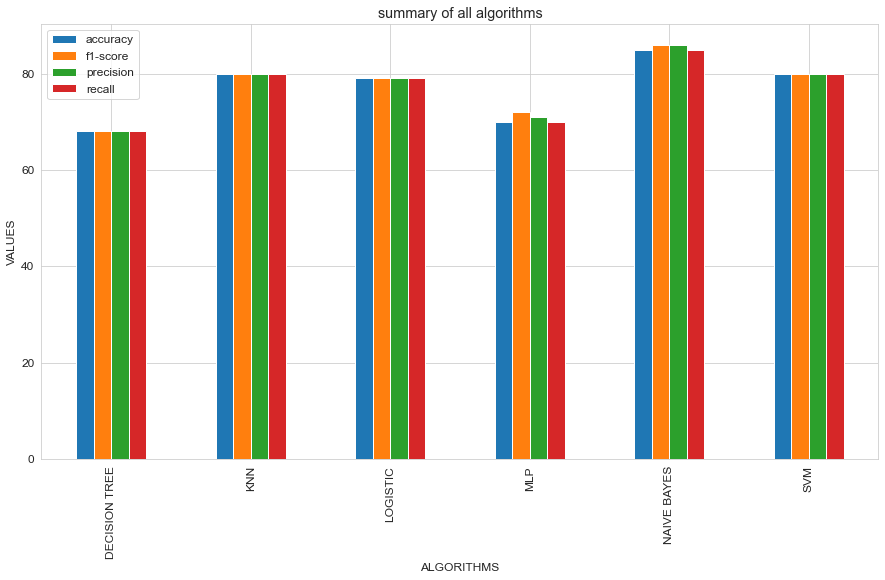

In [163]:
df.pivot(index='ALGORITHMS',columns='ATTRIBUTES',values='VALUES').plot(kind='bar',figsize=(15,8))
plt.xlabel('ALGORITHMS')
plt.ylabel('VALUES')
plt.title('summary of all algorithms')
plt.legend()
plt.show()

# constant

In [168]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold

In [169]:
df=pd.read_csv('C:/Users/chakr/Downloads/heart.csv')

In [170]:
df.shape

(303, 14)

In [171]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [172]:
X=df.drop(labels=['target'], axis=1)
y=df['target']

In [173]:
from sklearn.model_selection import train_test_split
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(labels=['target'], axis=1),
    df['target'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((212, 13), (91, 13))

In [174]:
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(X_train)

VarianceThreshold(threshold=0)

In [175]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [176]:
sum(var_thres.get_support())

13

In [177]:
len(X_train.columns[var_thres.get_support()])

13

In [178]:
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[var_thres.get_support()]]

print(len(constant_columns))

0


In [179]:
for column in constant_columns:
    print(column)

In [180]:
X_train.drop(constant_columns,axis=1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
137,62,1,1,128,208,1,0,140,0,0.0,2,0,2
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
284,61,1,0,140,207,0,0,138,1,1.9,2,1,3
44,39,1,2,140,321,0,0,182,0,0.0,2,0,2
139,64,1,0,128,263,0,1,105,1,0.2,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3
192,54,1,0,120,188,0,1,113,0,1.4,1,1,3
117,56,1,3,120,193,0,0,162,0,1.9,1,0,3
47,47,1,2,138,257,0,0,156,0,0.0,2,0,2


# HYPER PARAMETRIC TUNING

In [242]:
import pandas as pd

In [244]:
df=pd.read_csv('C:/Users/chakr/Downloads/heart.csv')

In [245]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [247]:
df.shape

(303, 14)

In [248]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [249]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [250]:
sex_dmy = pd.get_dummies(df['sex'], prefix='sex',drop_first=True)
cp_dmy = pd.get_dummies(df['cp'],prefix='cp', drop_first=True)
fbs_dmy = pd.get_dummies(df['fbs'],prefix='fbs', drop_first=True)
restecg_dmy = pd.get_dummies(df['restecg'],prefix='restecg', drop_first=True)
exang_dmy = pd.get_dummies(df['exang'],prefix='exang', drop_first=True)
slope_dmy = pd.get_dummies(df['slope'],prefix='slope', drop_first=True)
ca_dmy = pd.get_dummies(df['ca'],prefix='ca', drop_first=True)
thal_dmy = pd.get_dummies(df['thal'],prefix='thal', drop_first=True)


In [251]:
df2 = pd.concat([df,sex_dmy,cp_dmy,fbs_dmy,restecg_dmy,exang_dmy,slope_dmy,ca_dmy,thal_dmy], axis=1)

In [252]:
df2.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,63,1,3,145,233,1,0,150,0,2.3,...,0,0,0,0,0,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,0,0,0,0,0,0,0,1,0
2,41,0,1,130,204,0,0,172,0,1.4,...,0,0,1,0,0,0,0,0,1,0
3,56,1,1,120,236,0,1,178,0,0.8,...,0,0,1,0,0,0,0,0,1,0
4,57,0,0,120,354,0,1,163,1,0.6,...,1,0,1,0,0,0,0,0,1,0


In [253]:
#drop sex, cp, fbs, restecg, exang, slope, ca, thal features as we have handled categorical features
df3 = df2.drop(['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'],axis=1)

In [254]:
df3.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_1,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0


In [255]:
df3.describe()

,age,trestbps,chol,thalach,oldpeak,target,sex_1,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,...,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604,0.544554,0.683168,0.165017,0.287129,0.075908,...,0.326733,0.462046,0.468647,0.214521,0.125413,0.066007,0.016502,0.059406,0.547855,0.386139
std,9.082101,17.538143,51.830751,22.905161,1.161075,0.498835,0.466011,0.371809,0.453171,0.265288,...,0.469794,0.499382,0.499842,0.411169,0.331734,0.248704,0.127605,0.236774,0.498528,0.487668
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,61.000000,140.000000,274.500000,166.000000,1.600000,1.000000,1.000000,0.000000,1.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [256]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()

In [257]:
feature_scale = ['age','trestbps','chol','thalach','oldpeak']

In [258]:
df3[feature_scale] = standardScaler.fit_transform(df3[feature_scale])

In [259]:
df3.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_1,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0


In [260]:
X =  df3.drop(['target'],axis=1)

In [261]:
y = df3['target']

In [262]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [263]:
len(X_train)

242

In [264]:
len(X_test)

61

In [265]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [272]:
model_param = {
    'DecisionTreeClassifier':{
        'model':DecisionTreeClassifier(),
        'param':{
            'criterion': ['gini','entropy']
        }
    },
        'RandomForestClassifier':{
        'model':RandomForestClassifier(),
        'param':{
            'n_estimators': [20,50,80,120,150]
        }
    },
        'KNeighborsClassifier':{
        'model':KNeighborsClassifier(),
        'param':{
            'n_neighbors': [5,10,15,20,25]
        }
    },
        'SVC':{
        'model':SVC(),
        'param':{
            'kernel':['rbf','linear','sigmoid']
         
        }
    }
}

In [273]:
scores =[]
for model_name, mp in model_param.items():
    model_selection = GridSearchCV(estimator=mp['model'],param_grid=mp['param'],cv=5,return_train_score=False)
    model_selection.fit(X,y)
    scores.append({
        'model': model_name,
        'best_score': model_selection.best_score_,
        'best_params': model_selection.best_params_
    })

In [274]:
df_model_score = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_model_score

,model,best_score,best_params
0,DecisionTreeClassifier,0.742568,{'criterion': 'gini'}
1,RandomForestClassifier,0.805137,{'n_estimators': 120}
2,KNeighborsClassifier,0.792077,{'n_neighbors': 5}
3,SVC,0.818251,{'kernel': 'linear'}


# KNN

In [275]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [276]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [277]:
df = pd.read_csv('C:/Users/chakr/Downloads/heart.csv')

In [278]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [279]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


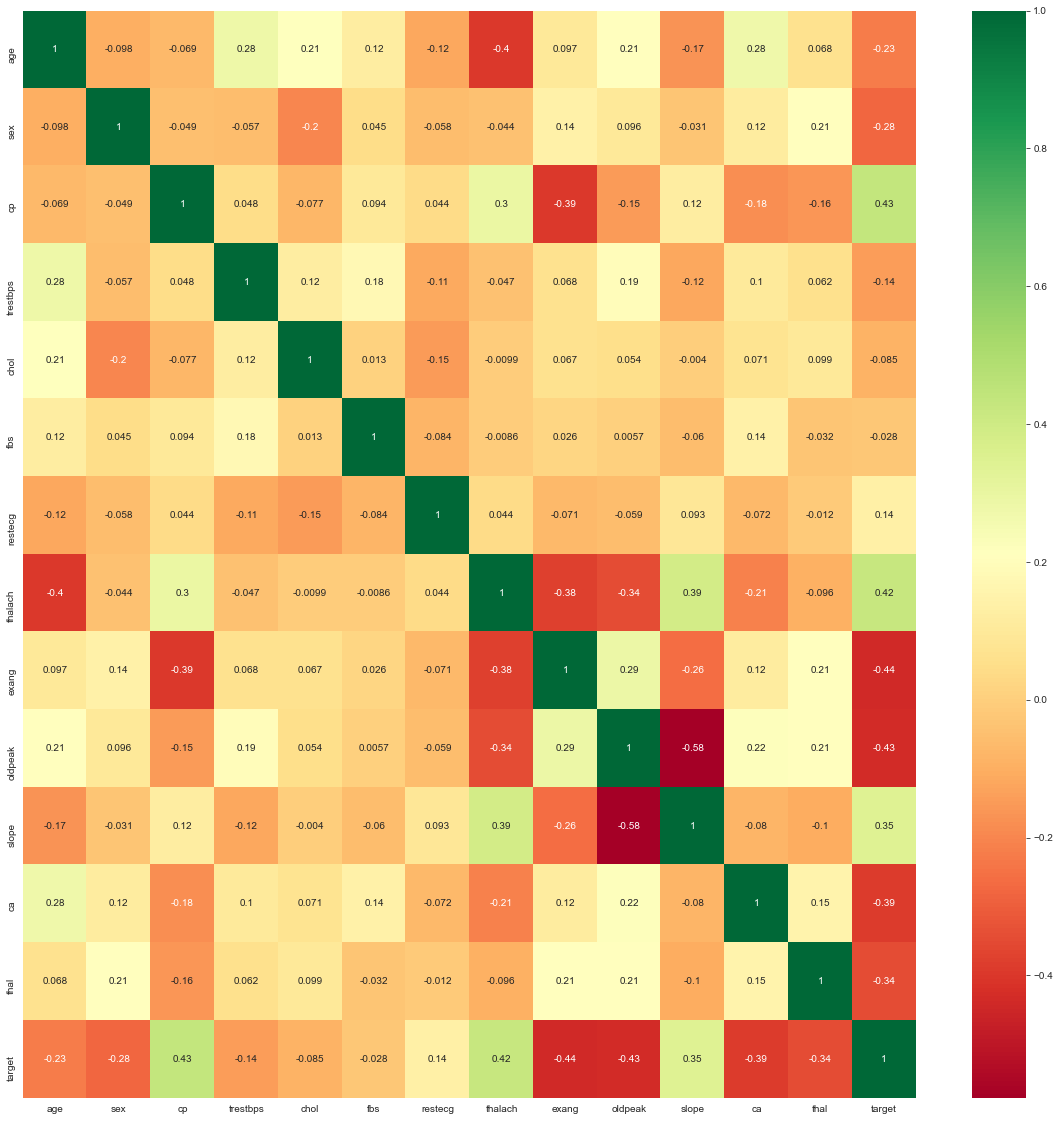

In [280]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

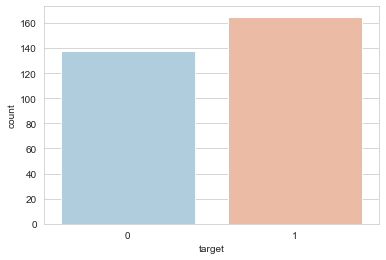

In [282]:
sns.set_style('whitegrid')
sns.countplot(x='target',data=df,palette='RdBu_r')

In [302]:
dataset = pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [303]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [304]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [305]:
y = dataset['target']
X = dataset.drop(['target'], axis = 1)

In [306]:
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X,y,cv=10)
    knn_scores.append(score.mean())

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

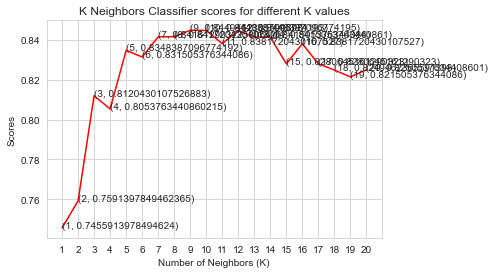

In [307]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [308]:
knn_classifier = KNeighborsClassifier(n_neighbors = 12)
score=cross_val_score(knn_classifier,X,y,cv=10)
knn_scores.append(score.mean())

In [309]:
knn_scores

[0.7455913978494624,
 0.7591397849462365,
 0.8120430107526883,
 0.8053763440860215,
 0.8348387096774192,
 0.831505376344086,
 0.8416129032258064,
 0.8417204301075267,
 0.8449462365591398,
 0.8448387096774193,
 0.8381720430107527,
 0.8448387096774195,
 0.841505376344086,
 0.8415053763440861,
 0.8280645161290323,
 0.8381720430107527,
 0.8280645161290323,
 0.8249462365591398,
 0.821505376344086,
 0.8250537634408601,
 0.8448387096774195]

In [310]:
score.mean()

0.8448387096774195

In [324]:
accofkn=score.mean()

In [325]:
accofknn=accofkn*100

In [327]:
accofknn

84.48387096774195

# RANDOM FOREST

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier 
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc

In [24]:
df = pd.read_csv('C:/Users/chakr/Downloads/heart.csv')

In [25]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [26]:
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol',
              'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
              'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 
              'thalassemia', 'target']

In [27]:
df.dtypes

age                          int64
sex                          int64
chest_pain_type              int64
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar          int64
rest_ecg                     int64
max_heart_rate_achieved      int64
exercise_induced_angina      int64
st_depression              float64
st_slope                     int64
num_major_vessels            int64
thalassemia                  int64
target                       int64
dtype: object

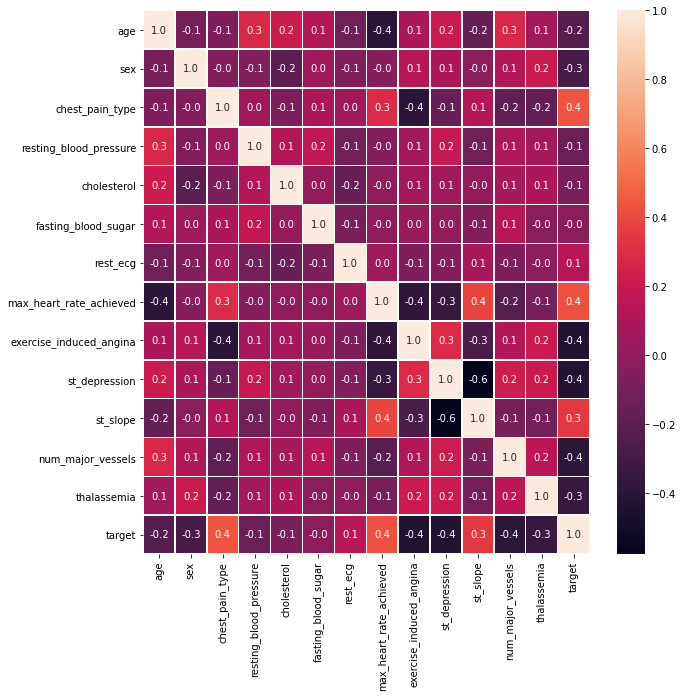

In [28]:
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,fmt='.1f',ax=ax)
plt.show()

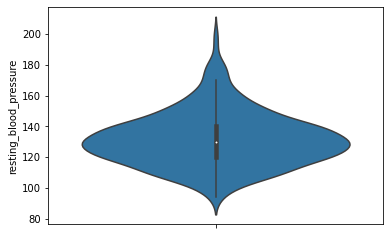

In [29]:
sns.violinplot(y='resting_blood_pressure',data=df)

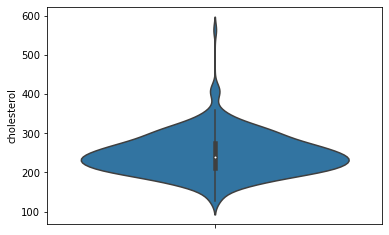

In [30]:
sns.violinplot(y='cholesterol',data=df)

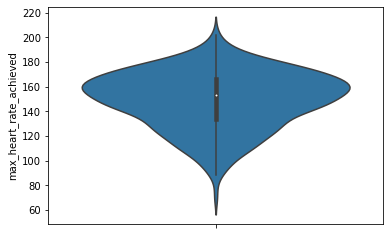

In [31]:
sns.violinplot(y='max_heart_rate_achieved',data=df)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', 1),
                                                    df['target'], test_size = 0.30, random_state=42)

In [33]:
model = RandomForestClassifier(max_depth=5)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [34]:
y_predict = model.predict(X_test)

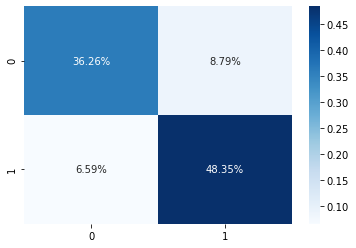

Accuracy is:  84.61538461538461


In [35]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm/np.sum(cm),annot=True,fmt=".2%",cmap='Blues')
plt.show()
ac = accuracy_score(y_test,y_predict)

print('Accuracy is: ',ac*100)

In [36]:
accofrf=ac*100
print(accofrf)

84.61538461538461


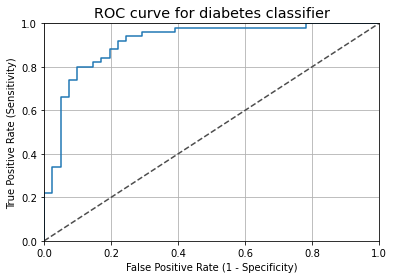

In [37]:
y_pred_quant = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [38]:
auc(fpr, tpr)

0.9126829268292682

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [56]:
accofdt=76

In [57]:
accofknn=84.4

In [58]:
accofrf=83.516

In [59]:
algorithms=['Decision Tree','KNN','RAndom forest']
scores=[accofdt,accofknn,accofrf]

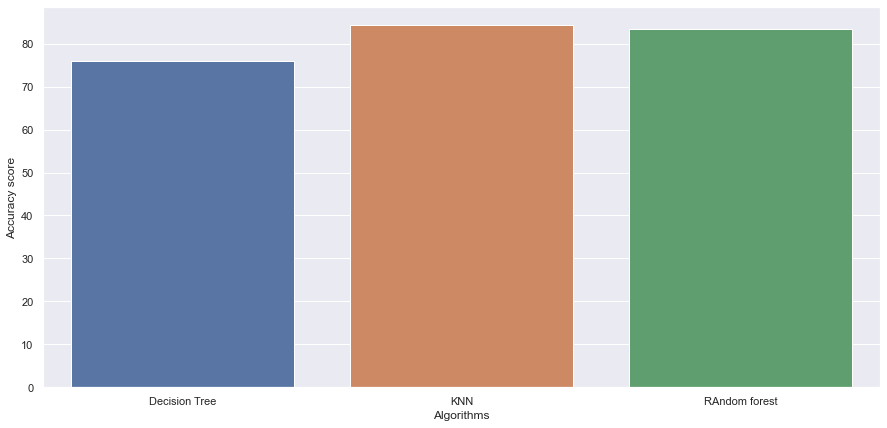

In [60]:
sns.set(rc={'figure.figsize':(15,7)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
sns.barplot(algorithms,scores)

In [44]:
import pandas as pd

In [45]:
algorithms={
    "Decision tree": 76,
    "knn": 84.4,
    "Random forest": 83,
    
}


In [46]:
algorithms

{'Decision tree': 76, 'knn': 84.4, 'Random forest': 83}

In [47]:
ticks = range(1,4)

In [48]:
height = list(algorithms.values())

In [49]:
tick_label = list(algorithms.keys())

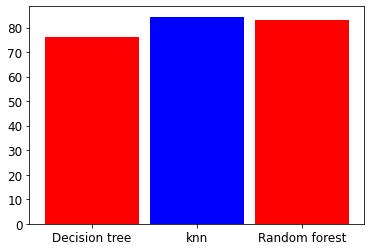

In [54]:
plt.bar(ticks, height, tick_label=tick_label, color=['r', 'b'], width=0.9)
plt.show()

# other websites

In [164]:
import pandas as pd
import matplotlib.pyplot as plt

In [165]:
df= pd.read_csv('C:/Users/chakr/Downloads/compare.csv') 

In [166]:
print(df)

            OTHER WEBSITES   ALGORITHMS USED  ACCURACY
0      INTERNATION COUNCIL     Decision tree     80.00
1  HEALTH CARE COMMUNITIES       naive bayes     76.00
2            RESEARCH GATE  decision support     80.56
3            SPRINGER OPEN               knn     82.56
4                  HINDAWI               ANN     85.00


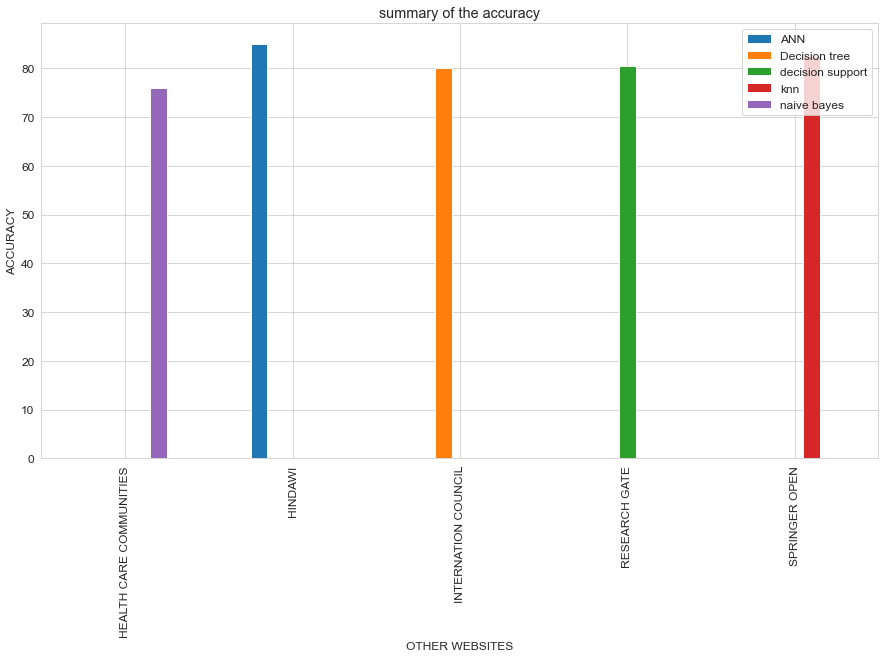

In [167]:
df.pivot(index='OTHER WEBSITES',columns='ALGORITHMS USED',values='ACCURACY').plot(kind='bar',figsize=(15,8))
plt.xlabel('OTHER WEBSITES')
plt.ylabel('ACCURACY')
plt.title('summary of the accuracy')
plt.legend()
plt.show()